In [1]:
import os
import time

from datetime import datetime as dt

import numpy as np
import pandas as pd

from ipywidgets import interact

import larch

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

os.chdir('..')
os.chdir('./catxas')
import catxas

#Timer to see how long it runs
t1 = time.time()

No conda env active, defaulting to base


In [2]:
len([])

0

# 1. Define where Data is Stored

In [2]:
### Modify paths inside the '' ###

# Folder containing ONLY CXAS spectra
data_dir = r'D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_red_Qscan_UP'

# Mass Spec File:
#MS_filename = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\20210614_Sievers_SnO2_H2View1.csv'

# AmP LabView File:
#LV_filename = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction\20210614_Sievers_SnO2_H2.txt'

# 2. Define BL Data Structure

In [3]:
### Define the layout of the xas data file and how spectra are calcualted
cxas_data_structure = {
    'time stamp': False,
    'data start time on line': 6,
    'data start time format': '# First Scan Create Date:\t%m/%d/%Y %I:%M:%S %p',
    'time on line': 7,
    'time format': '# This Scan Create Date:\t%m/%d/%Y %I:%M:%S %p',
    'padded scan numbers': True,
    'column names': ['Encoder', 'Energy', 'ADC_01', 'ADC_02', 'ADC_03', 'ADC_04', 'ADC_05', 'Time', 'Gate'],
    'energy column' : 'Energy', # Energy [eV]
    'sample numerator': 'ADC_04', # I3
    'sample denominator': 'ADC_01', # I1
    'sample ln': False,
    'sample invert': False,
    'reference numerator': 'ADC_02', # I1
    'reference denominator': 'ADC_03', # I2
    'reference ln': True,
    'reference invert': False,
    'Timing Signal': 'Time',
    'Scan Mode': 'QXAS' #'CXAS' 'Step' ### NEW!!!
}

# 3. Create Experiment Class and Import  Data
## 3a. Create Experiment Class

In [4]:
# Create the Experimental Class
my_exp = catxas.Experiment("Cu_SiO2_T2_450C_red_Qscan_UP")

# View keys created inside it
my_exp.__dict__.keys()

dict_keys(['name', 'process_params', 'spectra', 'analysis', 'summary'])

## 3b. Add BL Data

In [5]:
# Add raw data into spectra files
my_exp.import_spectra_data(data_dir, cxas_data_structure)

In [6]:
elapsed = time.time() - t1
print(f'Elapsed time: {elapsed:.2f} s')

Elapsed time: 513.02 s


In [7]:
# Show that the spectra were added to the experiment
list(my_exp.spectra.keys())

['20211129_Cu_SiO2_T2_450C_red_Qscan_00002',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00004',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00006',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00008',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00010',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00012',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00014',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00016',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00018',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00020',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00022',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00024',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00026',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00028',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00030',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00032',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00034',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00036',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00038',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00040',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00042',
 '20211129_Cu_SiO2_T2_450C_red_Qscan_00044',
 '20211129

In [8]:
scan_name1 = list(my_exp.spectra.keys())[0]
scan_name2 = list(my_exp.spectra.keys())[-1]

In [9]:
# Check contents of single spectrum
my_exp.spectra[scan_name1].keys()

dict_keys(['XAS Data Structure', 'Time', 'BL Data'])

In [10]:
# Check contents of single spectrum BL Data
my_exp.spectra[scan_name1]['XAS Data Structure']

{'time stamp': False,
 'data start time on line': 6,
 'data start time format': '# First Scan Create Date:\t%m/%d/%Y %I:%M:%S %p',
 'time on line': 7,
 'time format': '# This Scan Create Date:\t%m/%d/%Y %I:%M:%S %p',
 'padded scan numbers': True,
 'column names': ['Encoder',
  'Energy',
  'ADC_01',
  'ADC_02',
  'ADC_03',
  'ADC_04',
  'ADC_05',
  'Time',
  'Gate'],
 'energy column': 'Energy',
 'sample numerator': 'ADC_04',
 'sample denominator': 'ADC_01',
 'sample ln': False,
 'sample invert': False,
 'reference numerator': 'ADC_02',
 'reference denominator': 'ADC_03',
 'reference ln': True,
 'reference invert': False,
 'Timing Signal': 'Time',
 'Scan Mode': 'QXAS'}

# Development Block to Adding QXAS Timing Signal
## Can be skipped for now

In [124]:
# Create a dummy df to insert timing signal + voltage conversion values into it

tst_df = my_exp.summary['XAS Spectra Files'].copy()

# Add Column into df for timing
values = np.zeros(len(tst_df.index))
tst_df.insert(loc = 1, column = 'First Scan Time', value = values)
tst_df.insert(loc = 2, column = 'Time Since Start', value = values)

tst_df

,Time,First Scan Time,Time Since Start,File Name,Padded Name,Path
Scan,,,,,,
0,2021-11-29 16:13:18,0.0,0.0,20211129_Cu_SiO2_T2_450C_red_Qscan_00002,20211129_Cu_SiO2_T2_450C_red_Qscan_00002,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
1,2021-11-29 16:13:18,0.0,0.0,20211129_Cu_SiO2_T2_450C_red_Qscan_00004,20211129_Cu_SiO2_T2_450C_red_Qscan_00004,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
2,2021-11-29 16:13:18,0.0,0.0,20211129_Cu_SiO2_T2_450C_red_Qscan_00006,20211129_Cu_SiO2_T2_450C_red_Qscan_00006,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
3,2021-11-29 16:13:18,0.0,0.0,20211129_Cu_SiO2_T2_450C_red_Qscan_00008,20211129_Cu_SiO2_T2_450C_red_Qscan_00008,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
4,2021-11-29 16:13:18,0.0,0.0,20211129_Cu_SiO2_T2_450C_red_Qscan_00010,20211129_Cu_SiO2_T2_450C_red_Qscan_00010,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
...,...,...,...,...,...,...
1898,2021-11-29 19:00:07,0.0,0.0,20211129_Cu_SiO2_T2_450C_red_Qscan_03798,20211129_Cu_SiO2_T2_450C_red_Qscan_03798,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
1899,2021-11-29 19:00:07,0.0,0.0,20211129_Cu_SiO2_T2_450C_red_Qscan_03800,20211129_Cu_SiO2_T2_450C_red_Qscan_03800,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
1900,2021-11-29 19:00:07,0.0,0.0,20211129_Cu_SiO2_T2_450C_red_Qscan_03802,20211129_Cu_SiO2_T2_450C_red_Qscan_03802,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...


In [125]:
# Record the first scan time and the time signal (in seconds) of teh dirst data point of each scan

for key in my_exp.spectra.keys():
    # Index in the summary file of the spectra key
    index = tst_df.index[tst_df['File Name'] == key][0]
    
    # Determine the timing signal from the first datapoint
    First_Scan_Line = my_exp.spectra[key]['XAS Data Structure']['data start time on line']
    time_format = my_exp.spectra[key]['XAS Data Structure']['data start time format']
    
    t_signal_name = my_exp.spectra[key]['XAS Data Structure']['Timing Signal']
    
    date = dt.strptime(my_exp.spectra[scan_name1]['BL Data'].header[First_Scan_Line], time_format)    
    t1 = my_exp.spectra[key]['BL Data'].__dict__[t_signal_name][0]
    #t2 = my_exp.spectra[key]['BL Data'].__dict__[t_signal_name][-1]
    #t_signal = 2*(t2-t1)/1000000
    t_signal = t1/1000000
    
    # Write the time signals into the summary list
    tst_df['First Scan Time'].iloc[index] = date
    tst_df['Time Since Start'].iloc[index] = t_signal

In [126]:
tst_df

,Time,First Scan Time,Time Since Start,File Name,Padded Name,Path
Scan,,,,,,
0,2021-11-29 16:13:18,2021-11-29 16:13:18,2.269900,20211129_Cu_SiO2_T2_450C_red_Qscan_00002,20211129_Cu_SiO2_T2_450C_red_Qscan_00002,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
1,2021-11-29 16:13:18,2021-11-29 16:13:18,6.268100,20211129_Cu_SiO2_T2_450C_red_Qscan_00004,20211129_Cu_SiO2_T2_450C_red_Qscan_00004,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
2,2021-11-29 16:13:18,2021-11-29 16:13:18,10.270000,20211129_Cu_SiO2_T2_450C_red_Qscan_00006,20211129_Cu_SiO2_T2_450C_red_Qscan_00006,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
3,2021-11-29 16:13:18,2021-11-29 16:13:18,14.271400,20211129_Cu_SiO2_T2_450C_red_Qscan_00008,20211129_Cu_SiO2_T2_450C_red_Qscan_00008,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
4,2021-11-29 16:13:18,2021-11-29 16:13:18,18.268700,20211129_Cu_SiO2_T2_450C_red_Qscan_00010,20211129_Cu_SiO2_T2_450C_red_Qscan_00010,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
...,...,...,...,...,...,...
1898,2021-11-29 19:00:07,2021-11-29 16:13:18,1800.259508,20211129_Cu_SiO2_T2_450C_red_Qscan_03798,20211129_Cu_SiO2_T2_450C_red_Qscan_03798,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
1899,2021-11-29 19:00:07,2021-11-29 16:13:18,1804.258208,20211129_Cu_SiO2_T2_450C_red_Qscan_03800,20211129_Cu_SiO2_T2_450C_red_Qscan_03800,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...
1900,2021-11-29 19:00:07,2021-11-29 16:13:18,1808.258508,20211129_Cu_SiO2_T2_450C_red_Qscan_03802,20211129_Cu_SiO2_T2_450C_red_Qscan_03802,D:\5909_Christopher\20211129_Cu_SiO2_T2_450C_r...


In [118]:
# Look for discontinuities (jump or backwards in time) in the "Time Since Start" column
steps = []

for index, row in tst_df.iterrows():
    
    if index != 0:
        if tst_df['Time Since Start'][index] < tst_df['Time Since Start'][index-1] or (tst_df['Time Since Start'][index]-tst_df['Time Since Start'][index-1]) >5 :
            steps.append(index)

In [119]:
# index of spctra where there is a discontinnuity in timing
steps

[1002, 1302, 1448]

In [120]:
tst_df['Time Since Start'][steps[0]:steps[1]] = tst_df['Time Since Start'][steps[0]:steps[1]] + tst_df['Time Since Start'][steps[0]-1]

tst_df['Time Since Start'][steps[1]:steps[2]] = tst_df['Time Since Start'][steps[1]:steps[2]] + tst_df['Time Since Start'][steps[1]-1]

tst_df['Time Since Start'][steps[2]:] = tst_df['Time Since Start'][steps[2]:] + tst_df['Time Since Start'][steps[2]-1]

In [121]:
for row in tst_df.iterrows():
    print(row[1]['Time Since Start'], row[1]['File Name'])

2.2699 20211129_Cu_SiO2_T2_450C_red_Qscan_00002
6.2681 20211129_Cu_SiO2_T2_450C_red_Qscan_00004
10.27 20211129_Cu_SiO2_T2_450C_red_Qscan_00006
14.2714 20211129_Cu_SiO2_T2_450C_red_Qscan_00008
18.2687 20211129_Cu_SiO2_T2_450C_red_Qscan_00010
22.2694 20211129_Cu_SiO2_T2_450C_red_Qscan_00012
26.2693 20211129_Cu_SiO2_T2_450C_red_Qscan_00014
30.2674 20211129_Cu_SiO2_T2_450C_red_Qscan_00016
34.2691 20211129_Cu_SiO2_T2_450C_red_Qscan_00018
38.2691 20211129_Cu_SiO2_T2_450C_red_Qscan_00020
42.2696 20211129_Cu_SiO2_T2_450C_red_Qscan_00022
46.269 20211129_Cu_SiO2_T2_450C_red_Qscan_00024
50.2691 20211129_Cu_SiO2_T2_450C_red_Qscan_00026
54.2682 20211129_Cu_SiO2_T2_450C_red_Qscan_00028
58.2682 20211129_Cu_SiO2_T2_450C_red_Qscan_00030
62.2689 20211129_Cu_SiO2_T2_450C_red_Qscan_00032
66.2681 20211129_Cu_SiO2_T2_450C_red_Qscan_00034
70.2691 20211129_Cu_SiO2_T2_450C_red_Qscan_00036
74.2699 20211129_Cu_SiO2_T2_450C_red_Qscan_00038
78.2667 20211129_Cu_SiO2_T2_450C_red_Qscan_00040
82.2698 20211129_Cu_SiO2_

4761.505104 20211129_Cu_SiO2_T2_450C_red_Qscan_02332
4765.505704 20211129_Cu_SiO2_T2_450C_red_Qscan_02334
4769.507404 20211129_Cu_SiO2_T2_450C_red_Qscan_02336
4773.503904 20211129_Cu_SiO2_T2_450C_red_Qscan_02338
4777.505404 20211129_Cu_SiO2_T2_450C_red_Qscan_02340
4781.504604 20211129_Cu_SiO2_T2_450C_red_Qscan_02342
4785.505304 20211129_Cu_SiO2_T2_450C_red_Qscan_02344
4789.507404 20211129_Cu_SiO2_T2_450C_red_Qscan_02346
4793.506104 20211129_Cu_SiO2_T2_450C_red_Qscan_02348
4797.504004 20211129_Cu_SiO2_T2_450C_red_Qscan_02350
4801.505804 20211129_Cu_SiO2_T2_450C_red_Qscan_02352
4805.506004 20211129_Cu_SiO2_T2_450C_red_Qscan_02354
4809.504204 20211129_Cu_SiO2_T2_450C_red_Qscan_02356
4813.505404 20211129_Cu_SiO2_T2_450C_red_Qscan_02358
4817.505904000001 20211129_Cu_SiO2_T2_450C_red_Qscan_02360
4821.504604 20211129_Cu_SiO2_T2_450C_red_Qscan_02362
4825.505204 20211129_Cu_SiO2_T2_450C_red_Qscan_02364
4829.505204 20211129_Cu_SiO2_T2_450C_red_Qscan_02366
4833.503804 20211129_Cu_SiO2_T2_450C_red

(0.0, 5000.0)

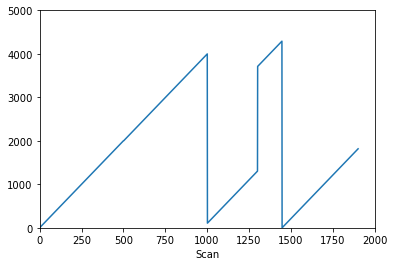

In [129]:
tst_df['Time Since Start'].plot(logx = False, logy = False)
plt.xlim([0,2000])
plt.ylim([0,5000])

In [131]:
1903*4

7612

# End Timing Development Block

# Development Block to Remove short spectra from QXAS Data

## Should be obsolete once DB Export bugs are fixed

## MANDATORY UNTIL QXAS DB SLICING BUG FIXED

In [ ]:
# Check Size (data points) for each spectra
df, mean_dpts, stdev_dpts = my_exp.summarize_file_lengths()

In [ ]:
# Find all spectra that are less than 2 stdev below mean
threshold = mean_dpts-5*stdev_dpts
rows_with_lowPts = df[df['Data Points']<threshold].Filename.values
rows_with_lowPts

In [ ]:
my_exp.remove_bad_spectra(rows_with_lowPts)

In [ ]:
# Confirm Spectra removed
if 'Spectra Removed' in my_exp.summary:
    print('Spectra Removed from Experiment:')
    for line in my_exp.summary['Spectra Removed']:
        print(f'\t{line}')

In [ ]:
for line in rows_with_lowPts: 
    if not line in my_exp.spectra:
        print(f'{line} Removed from Experiment')
    else:
        print(f'{line} STILL IN EXP!!!')

In [ ]:
# Organize data to remove duplicate encoder values
my_exp.organize_RawData(remove_nan_inf = False, remove_zeros = False)

## 3c. Add Process Parameter Data 

### Obsolete until timing step is resolved

In [ ]:
# Add Mass Spec Dataset
#my_exp.import_massspec(MS_filename)

# Add LabView Dataset
#my_exp.import_labview(LV_filename)

# Display Keys of System
#my_exp.process_params.keys()

In [ ]:
# Check contents of Mass Spec Data
#my_exp.process_params['MS Data']

In [ ]:
# Check contents of Mass Spec Data
#my_exp.process_params['LV Data']

# 4. Correlate Process Paramters to X-ray Spectra Timestamps

## Obsolete until timing is fixed for QXAS

## 4a. Correlate Parameters

In [ ]:
# Correlate Process Params
#my_exp.correlate_process_params()

# View Correlation Table
#my_exp.summary['XAS Spectra Process Params']

## 4b. Save Correlation Table

In [ ]:
# Save Process paramters:

# Define path and filename to save Correlated Process Parameters:
#output_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction'

# Save the Values
#my_exp.save_processparams(output_dir)

# 5. Calcualte Absorption Spectra [Sample and/or Reference]

In [ ]:
# Calculates the absoprtion spectra of the sample and the reference 
my_exp.calculate_spectra(sample_spectra = True, ref_spectra = True)

In [ ]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample']

In [ ]:
# Check that absorption spectra were calculated
my_exp.spectra[scan_name]['Absorption Spectra']['mu Reference']

In [ ]:
len(np.argwhere(np.isfinite(my_exp.spectra[scan_name]['Absorption Spectra']['mu Reference'].mu)))

In [ ]:
# Quick Visualization of Raw Data
for key in my_exp.spectra.keys():
    x = my_exp.spectra[key]['Absorption Spectra']['mu Sample'].energy
    y = my_exp.spectra[key]['Absorption Spectra']['mu Sample'].mu
    plt.plot(x,y)
    
#plt.xlim([8930, 9130])

In [ ]:
len(my_exp.spectra.keys())

# 6. Calibrate Spectra
## 6a. Calibrate Reference Spectra

In [ ]:
#Reference Calibration Energy

#### add functional to calibrate each spectra separately
Ref_E0 = 8979
my_exp.calibrate_reference_spectra(Ref_E0, use_mean = True, energy_range = 20)

## 6b. Calculate Sample E0

In [ ]:
#Approximate edge of the Sample and determine approxiamte edge position
Samp_E0 = 8979
my_exp.find_sample_e0(Samp_E0)

In [ ]:
my_exp.spectra[scan_name]['Time']

In [ ]:
my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample'].e0

# 7. Normalize Spectra
## 7a. Define normalization paramaters (can be separate for reference channel)

In [ ]:
# Check starting and ending energy ranges for normalization purposes
df = my_exp.check_Energy_Range()
# Visualize parameters for each spectra
df

In [ ]:
#Normalization paramters, references to E0
pre1 = -150
pre2 = -50
norm1 = 75
norm2 = 700
nnorm = 2
make_flat = True

## 7b. Store normalization parameters into each spectrum

In [ ]:
my_exp.set_normalization_parameters('mu Reference', pre1 = pre1, pre2 = pre2, 
                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
                                    make_flat = make_flat)

my_exp.set_normalization_parameters('mu Sample', pre1 = pre1, pre2 = pre2, 
                                    norm1 = norm1, norm2 = norm2, nnorm = nnorm, 
                                    make_flat = make_flat)



## 7c. Normalize and visualize spectra

In [ ]:
# Normalize Specta
my_exp.normalize_spectra('mu Reference')
my_exp.normalize_spectra('mu Sample')

In [ ]:
# Visualization of Normalized Spectra
my_exp.plot_norm_spectra(spectra = 'mu Sample')
my_exp.plot_norm_spectra(spectra = 'mu Reference')

# 8. Interpolation of XANES Spectra
## 8a. Determining how to interpolate XAS Structure

In [ ]:
#df = my_exp.check_Energy_Range()

In [ ]:
# Visualize parameters for each spectra
#df

## 8b. Interpolate XANES Spectra onto defined grid

### Interpolation step needed to expot data to CSV for use in MES software
### Still need to work out legend step for timing signal

In [ ]:
# Set the energy range and step size to interpolate onto
start = 29050
stop = 29450
step = 0.25

# Interpolate Spectra
result = my_exp.interpolate_spectra(start, stop, step, x_axis = 'energy', sample = 'mu Sample')

In [ ]:
# Visualzie Interpolated Spectra
result.plot(legend=False)

In [ ]:
# Inspect DataFrame containing interpoalted spectra
result

## 8c. Save the dataframe to a csv file 

In [ ]:
# Define path and filename to save Normalized XANES:
output_dir = r'C:\Users\ashoff\OneDrive - SLAC National Accelerator Laboratory\Co-ACCESS Shared Folder\Python Scripts and GUIs\Example Data 1 - SnO2 Reduction'
result_name = 'NormXANES'

# Save Normalized XANES:
result.to_csv(os.path.join(output_dir,result_name + '.csv'), sep=',', header=True, index=True)

# 9. Linear Combination Fitting
## 9a. LCF using Sample Spectra (First/Last Spectra)

In [ ]:
# Basis set made from three spectra in the sample dataset
basis1 = my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample'] 
basis1.name = scan_name

#basis2 = my_exp.spectra['20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0031']['Absorption Spectra']['mu Sample']
#basis2.name = '20210614_SnO2_H2_TPR_Sn_EXAFS_92.tra_0031'

basis3 = my_exp.spectra[scan_name2]['Absorption Spectra']['mu Sample']
basis3.name = scan_name2

basis = [basis1, basis3]
#basis = [basis1, basis2, basis3]

In [ ]:
# Load list of basis spectra into the experiment
my_exp.load_lcf_basis(basis, 'Fit 1')

In [ ]:
# Visualize basis sets to confirm normalized
for line in my_exp.analysis['LCF']['Fit 1']['basis spectra']:
    x = line.energy
    y = line.flat
    label = line.name
    plt.plot(x,y, label = label)
    
plt.legend()

In [ ]:
# Fit the sample spectra
emin = 8950
emax = 9080

my_exp.fit_LCF('Fit 1', emin, emax, weights=None, minvals=0, maxvals=1, arrayname='flat', sum_to_one=True)

In [ ]:
# Generate fit report for all spectra
my_exp.lcf_report('Fit 1')
my_exp.analysis['LCF']['Fit 1']['Fit Summary']

In [ ]:
# Save Fit Report
#LCFReport_name = 'First_Last_LCFReport'

#my_exp.analysis['LCF']['Fit 1']['Fit Summary'].to_csv(os.path.join(output_dir,LCFReport_name + '.csv'), sep=',', header=True, index=False)

In [ ]:
my_exp.plot_LCF_results('Fit 1')

In [ ]:
# use interact decorator to decorate the function, so the function can receive the slide bar's value with parameter x.
spectra_names = list(my_exp.spectra.keys())

@interact(x=(1, len(spectra_names)))
def plot_LCF(x):
    key = spectra_names[x-1]
    #print(key)
    
    fig1 = plt.figure(constrained_layout=True, figsize = (12,10))
    spec1 = gridspec.GridSpec(ncols = 1, nrows = 1, figure = fig1)

    f1_ax1 = fig1.add_subplot(spec1[0])
    
    x = my_exp.analysis['LCF']['Fit 1']['Results'][key].xdata
    y1 = my_exp.analysis['LCF']['Fit 1']['Results'][key].ydata
    y2 = my_exp.analysis['LCF']['Fit 1']['Results'][key].yfit
    y4 = y1-y2

    f1_ax1.plot(x, y1, color = 'k', label = 'Data')
    f1_ax1.plot(x, y2, color = 'r', label = 'Fit')
    f1_ax1.plot(x, y4, color = 'b', label = 'Resid')
    

    for key2 in my_exp.analysis['LCF']['Fit 1']['Results'][key].ycomps.keys():
        y3 = my_exp.analysis['LCF']['Fit 1']['Results'][key].ycomps[key2]
        f1_ax1.plot(x,y3, label = key2)
    
    plt.xlim(8950,9080)
    plt.ylim(-0.05, 1.6)
    plt.title(key)
    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

## 9b. LCF using First/intermediate1/Intmerdiate2/Last
### NOTE: Project file must be calibrated and normalized

In [ ]:
# Basis set made from three spectra in the sample dataset
basis1 = my_exp.spectra[scan_name]['Absorption Spectra']['mu Sample'] 
basis1.name = scan_name

basis2 = my_exp.spectra['20211129_Cu_SiO2_T2_450C_red_Qscan_00300']['Absorption Spectra']['mu Sample'] 
basis2.name = '20211129_Cu_SiO2_T2_450C_red_Qscan_00300'

basis3 = my_exp.spectra['20211129_Cu_SiO2_T2_450C_red_Qscan_00554']['Absorption Spectra']['mu Sample'] 
basis3.name = '20211129_Cu_SiO2_T2_450C_red_Qscan_00554'

basis4 = my_exp.spectra[scan_name2]['Absorption Spectra']['mu Sample']
basis4.name = scan_name2

#basis = [basis1, basis3]
basis = [basis1, basis2, basis3, basis4]

In [ ]:
my_exp.load_lcf_basis(basis, 'Fit 2')

In [ ]:
for line in my_exp.analysis['LCF']['Fit 2']['basis spectra']:
    x = line.energy
    y = line.flat
    label = line.name
    plt.plot(x,y, label = label)
    
plt.legend()
plt.xlim([8930, 9130])

In [ ]:
# Fit the sample spectra
emin = 8950
emax = 9080

my_exp.fit_LCF('Fit 2', emin, emax, weights=None, minvals=0, maxvals=1, arrayname='flat', sum_to_one=True)

In [ ]:
# Generate fit report for all spectra
my_exp.lcf_report('Fit 2')
my_exp.analysis['LCF']['Fit 2']['Fit Summary']

In [ ]:
# Save Fit Report
#LCFReport_name = 'Bulk_Standards_LCFReport'

#my_exp.analysis['LCF']['Fit 2']['Fit Summary'].to_csv(os.path.join(output_dir,LCFReport_name + '.csv'), sep=',', header=True, index=False)

In [ ]:
my_exp.plot_LCF_results('Fit 2')

In [ ]:
# use interact decorator to decorate the function, so the function can receive the slide bar's value with parameter x.
spectra_names = list(my_exp.spectra.keys())

@interact(x=(1, len(spectra_names)))
def plot_LCF(x):
    key = spectra_names[x-1]
    #print(key)
    
    fig1 = plt.figure(constrained_layout=True, figsize = (12,10))
    spec1 = gridspec.GridSpec(ncols = 1, nrows = 1, figure = fig1)

    f1_ax1 = fig1.add_subplot(spec1[0])
    
    x = my_exp.analysis['LCF']['Fit 2']['Results'][key].xdata
    y1 = my_exp.analysis['LCF']['Fit 2']['Results'][key].ydata
    y2 = my_exp.analysis['LCF']['Fit 2']['Results'][key].yfit
    y4 = y1-y2

    f1_ax1.plot(x, y1, color = 'k', label = 'Data')
    f1_ax1.plot(x, y2, color = 'r', label = 'Fit')
    f1_ax1.plot(x, y4, color = 'b', label = 'Resid')

    for key2 in my_exp.analysis['LCF']['Fit 2']['Results'][key].ycomps.keys():
        y3 = my_exp.analysis['LCF']['Fit 2']['Results'][key].ycomps[key2]
        f1_ax1.plot(x,y3, label = key2)
    
    plt.xlim(8950,9080)
    plt.ylim(-0.05, 1.6)
    plt.title(key)
    plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))

In [ ]:
elapsed = time.time() - t1
print(f'Elapsed time: {elapsed:.2f} s')